In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [13]:
# Load dataset
file_path = "/mnt/data/credit_card_fraud_dataset.csv"
df = pd.read_csv(file_path)

In [14]:
# Drop unnecessary column
df.drop(columns=['TransactionID'], inplace=True)

In [15]:
# Convert TransactionDate to datetime
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['TransactionHour'] = df['TransactionDate'].dt.hour
df['TransactionDay'] = df['TransactionDate'].dt.day
df.drop(columns=['TransactionDate'], inplace=True)

In [16]:
# Encode categorical features
encoder = LabelEncoder()
df['TransactionType'] = encoder.fit_transform(df['TransactionType'])
df['Location'] = encoder.fit_transform(df['Location'])

<ipython-input-17-83d1b7c8707e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='IsFraud', data=df, palette=['green', 'red'])


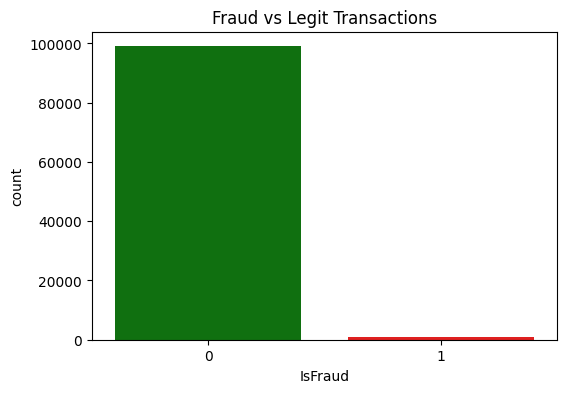

In [17]:
# Fraud vs Legit transactions visualization
plt.figure(figsize=(6,4))
sns.countplot(x='IsFraud', data=df, palette=['green', 'red'])
plt.title("Fraud vs Legit Transactions")
plt.show()

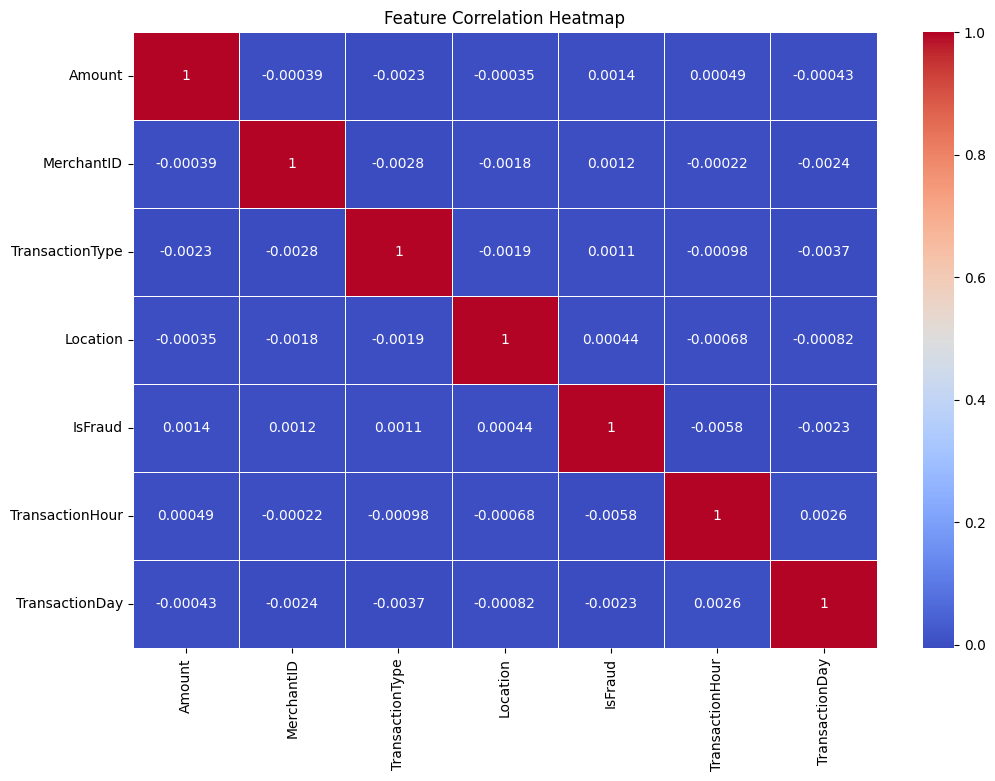

In [18]:
# Correlation Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='coolwarm', linewidths=0.5, annot=True)
plt.title("Feature Correlation Heatmap")
plt.show()

In [19]:
# Separate features and labels
X = df.drop(columns=['IsFraud'])
y = df['IsFraud']

In [20]:
# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [21]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [22]:
# Train multiple models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
}

In [23]:
# Evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name} Model Performance:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))


Random Forest Model Performance:
Accuracy: 0.98935
Confusion Matrix:
 [[19787     0]
 [  213     0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     19787
           1       0.00      0.00      0.00       213

    accuracy                           0.99     20000
   macro avg       0.49      0.50      0.50     20000
weighted avg       0.98      0.99      0.98     20000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Gradient Boosting Model Performance:
Accuracy: 0.9877
Confusion Matrix:
 [[19754    33]
 [  213     0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     19787
           1       0.00      0.00      0.00       213

    accuracy                           0.99     20000
   macro avg       0.49      0.50      0.50     20000
weighted avg       0.98      0.99      0.98     20000



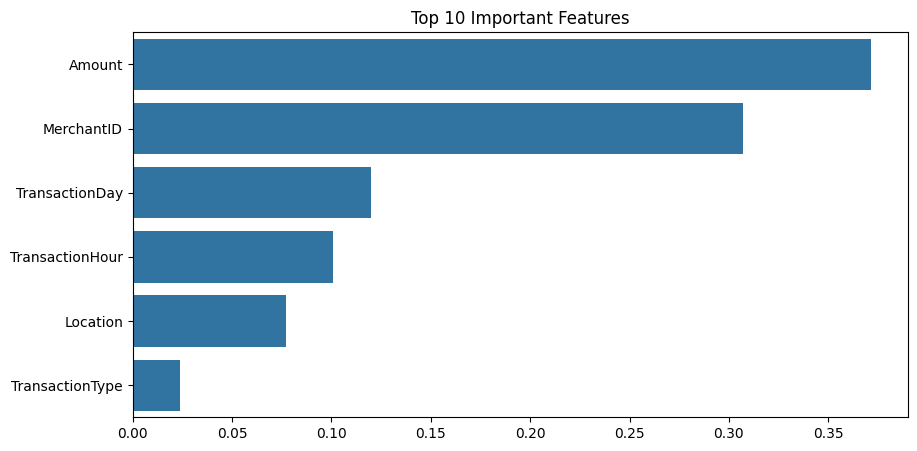

In [24]:
# Feature Importance (Random Forest)
rf_model = models["Random Forest"]
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(10,5))
sns.barplot(x=importances[indices][:10], y=[features[i] for i in indices[:10]])
plt.title("Top 10 Important Features")
plt.show()